# PHASE 3

# SQL Operations

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# REQ - 3.1

# Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [2]:
#Load data file
df = pd.read_csv('C:\\Users\\Oscar Jacob\\Desktop\\Phase 1\\42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [3]:
#Data clean up

df.columns = df.columns.str.strip()

In [4]:
#Create/Connect to a sqlite database
connection = sqlite3.connect("crime_database")

In [5]:
#Load data file to sqlite
df.to_sql('crimes_against_women',connection,if_exists = 'replace')

8597

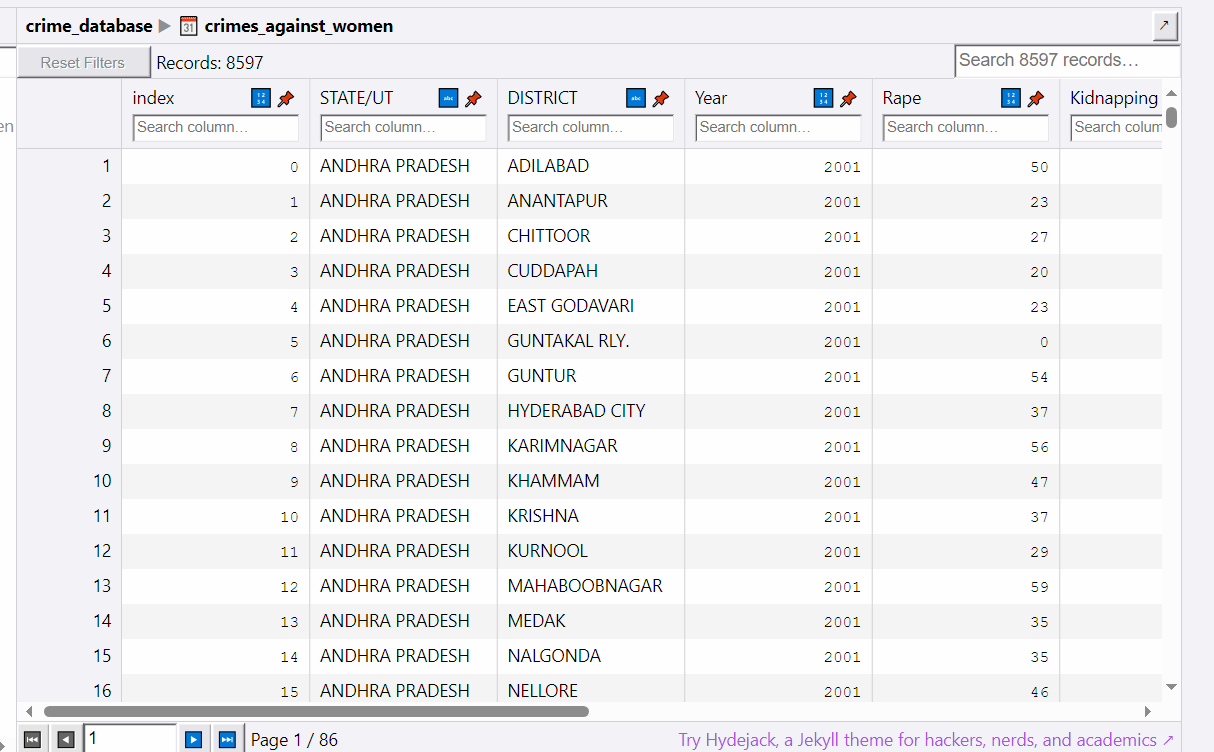

# REQ - 3.2

# Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year



In [40]:
result=connection.execute("""SELECT "STATE/UT", DISTRICT, Year, MAX(Rape) AS max_rapes, MAX("Kidnapping and Abduction") AS max_kidnappings FROM crimes_against_women
GROUP BY "Year"
ORDER BY max_rapes DESC LIMIT 1;""")
for row in result:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Rapes: {row[3]}")

State: WEST BENGAL, District: MURSHIDABAD, Year: 2009, Rapes: 568


In [39]:
result=connection.execute("""SELECT "STATE/UT", DISTRICT, Year, MAX(Rape) AS max_rapes, MAX("Kidnapping and Abduction") AS max_kidnappings FROM crimes_against_women
GROUP BY "Year"
ORDER BY max_kidnappings DESC LIMIT 1;""")
for row in result:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Kidnappings: {row[4]}")


State: WEST BENGAL, District: MURSHIDABAD, Year: 2011, Kidnappings: 492


> In the year **2009** , State : **West Bengal**, and District : **Murshidabad** had the highest number of Rapes - **568**



> In the year **2011** , State : **West Bengal**, and District : **Murshidabad** had the highest number of Kidnappings - **492**

# REQ - 3.3

# Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [12]:
result=connection.execute("""SELECT "STATE/UT", DISTRICT, Year, MIN(Rape) AS min_rapes, MIN("Kidnapping and Abduction") AS min_kidnappings FROM crimes_against_women
GROUP BY "Year"
ORDER BY min_rapes DESC;""")
for row in result:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Rapes: {row[3]}, Kidnappings: {row[4]}")

State: ANDHRA PRADESH, District: GUNTAKAL RLY., Year: 2012, Rapes: 0, Kidnappings: 0
State: ANDHRA PRADESH, District: GUNTAKAL RLY., Year: 2011, Rapes: 0, Kidnappings: 0
State: ANDHRA PRADESH, District: VIJAYAWADA RLY., Year: 2010, Rapes: 0, Kidnappings: 0
State: ANDHRA PRADESH, District: GUNTAKAL RLY., Year: 2009, Rapes: 0, Kidnappings: 0
State: ANDHRA PRADESH, District: GUNTAKAL RLY., Year: 2008, Rapes: 0, Kidnappings: 0
State: ANDHRA PRADESH, District: SECUNDERABAD RLY., Year: 2007, Rapes: 0, Kidnappings: 0
State: ANDHRA PRADESH, District: VIJAYAWADA RLY., Year: 2006, Rapes: 0, Kidnappings: 0
State: ANDHRA PRADESH, District: SECUNDERABAD RLY., Year: 2005, Rapes: 0, Kidnappings: 0
State: ANDHRA PRADESH, District: GUNTAKAL RLY., Year: 2004, Rapes: 0, Kidnappings: 0
State: ANDHRA PRADESH, District: SECUNDERABAD RLY., Year: 2003, Rapes: 0, Kidnappings: 0
State: ANDHRA PRADESH, District: GUNTAKAL RLY., Year: 2002, Rapes: 0, Kidnappings: 0
State: ANDHRA PRADESH, District: GUNTAKAL RLY., Y

> **All the above result showing Minimum of Rape And KIdnapping in each state And year.**

# REQ - 3.4

# Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [17]:
#Load data file
df = pd.read_csv('C:\\Users\\Oscar Jacob\\Desktop\\Phase 1\\02_District_wise_crimes_committed_against_ST_2001_2012.csv')

In [18]:
#Data clean up

df.columns = df.columns.str.strip()

In [19]:
#Create/Connect to a sqlite database
connection = sqlite3.connect("crime_database")

In [20]:
#Load data file to sqlite
df.to_sql('crimes_against_ST',connection,if_exists = 'replace')

8597

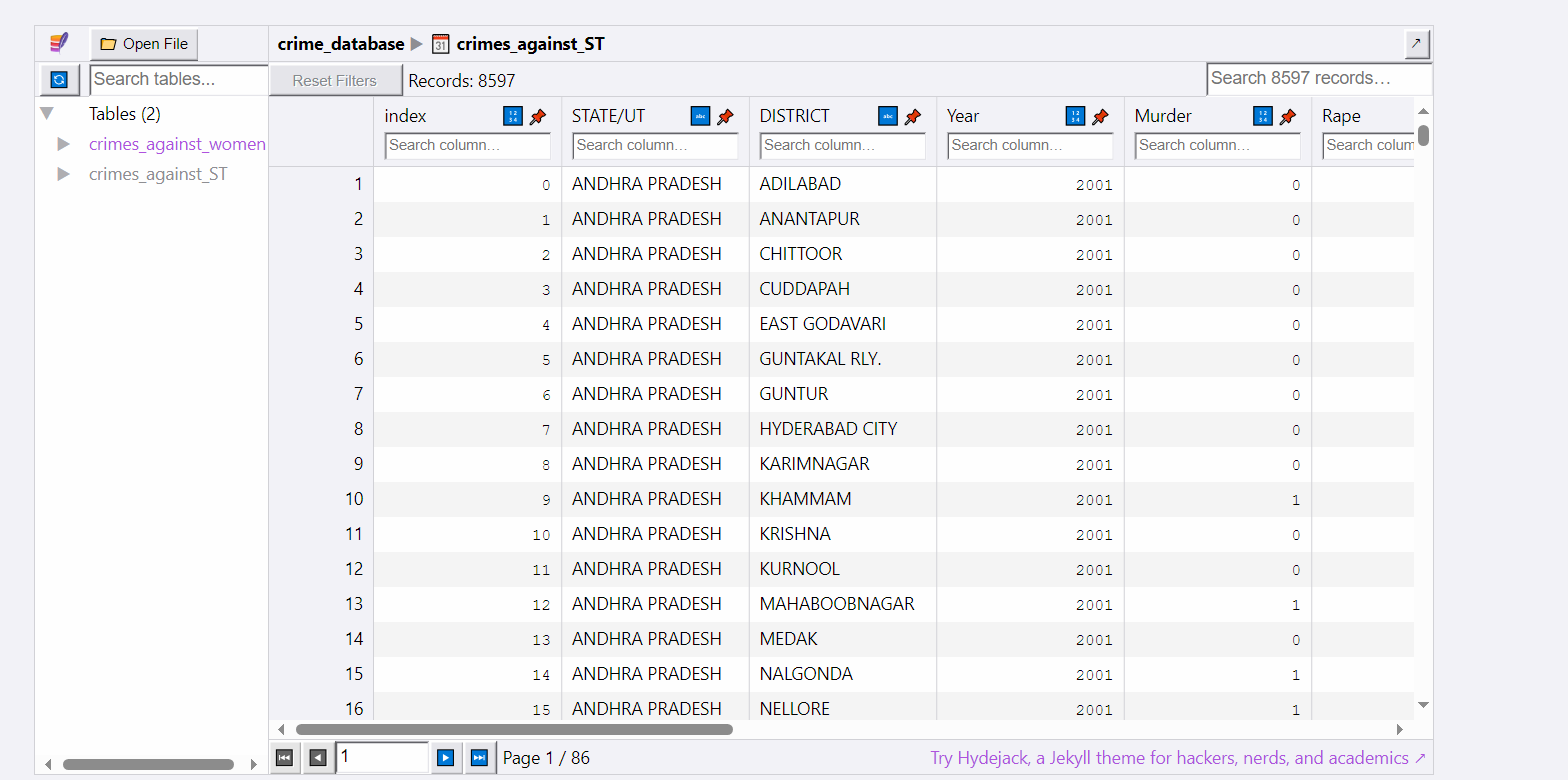

# REQ - 3.5

# Write SQL query to find the highest number of dacoity/robbery in which district.

In [22]:
result=connection.execute("""SELECT "STATE/UT", DISTRICT, Year, MAX(Dacoity) AS max_dacoity, MAX(Robbery) AS max_robbery FROM crimes_against_ST
limit 1 ;""")
for row in result:
    print(f"State: {row[0]}, District: {row[1]}, Year: {row[2]}, Dacoity: {row[3]}, Robbery: {row[4]}")

State: GUJARAT, District: DAHOD, Year: 2001, Dacoity: 29, Robbery: 32


**Dahod District of Gujarat has highest number of Daocity and Robbery in Year 2001**

# REQ - 3.6

# Write SQL query to find in which districts(All) the lowest number of murders happened

In [28]:
result=connection.execute("""SELECT "STATE/UT", DISTRICT,Murder FROM crimes_against_ST WHERE Murder = (SELECT MIN(Murder)  FROM crimes_against_ST) GROUP BY "STATE/UT"
 ;""")
for row in result:
    print(row)

('A & N ISLANDS', 'ANDAMAN', 0)
('ANDHRA PRADESH', 'ADILABAD', 0)
('ARUNACHAL PRADESH', 'CHANGLANG', 0)
('ASSAM', 'BARPETA', 0)
('BIHAR', 'ARWAL', 0)
('CHANDIGARH', 'CHANDIGARH', 0)
('CHHATTISGARH', 'BALRAMPUR', 0)
('D & N HAVELI', 'D and N HAVELI', 0)
('DAMAN & DIU', 'DAMAN', 0)
('DELHI', 'CENTRAL', 0)
('GOA', 'NORTH GOA', 0)
('GUJARAT', 'AHMEDABAD COMMR.', 0)
('HARYANA', 'AMBALA', 0)
('HIMACHAL PRADESH', 'BILASPUR', 0)
('JAMMU & KASHMIR', 'ANANTNAG', 0)
('JHARKHAND', 'BOKARO', 0)
('KARNATAKA', 'BAGALKOT', 0)
('KERALA', 'ALAPUZHA', 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 0)
('MADHYA PRADESH', 'BETUL', 0)
('MAHARASHTRA', 'AKOLA', 0)
('MANIPUR', 'BISHNUPUR', 0)
('MEGHALAYA', 'GARO HILLS EAST', 0)
('MIZORAM', 'AIZAWL', 0)
('NAGALAND', 'DIMAPUR', 0)
('ODISHA', 'ANGUL', 0)
('PUDUCHERRY', 'PONDICHERRY', 0)
('PUNJAB', 'AMRITSAR', 0)
('RAJASTHAN', 'AJMER', 0)
('SIKKIM', 'NORTH', 0)
('TAMIL NADU', 'ARIYALUR', 0)
('TRIPURA', 'DHALAI', 0)
('UTTAR PRADESH', 'AGRA', 0)
('UTTARAKHAND', 'ALMORA', 0)
('WES

**The Above result of query shows the minimum number of Murders happened in each Ditsrict**

# REQ - 3.7

# Write SQL query to find the number of murders in ascending order in district and yearwise.



In [38]:
result=connection.execute("""SELECT DISTRICT,Year,Murder FROM crimes_against_ST GROUP BY District,Year
ORDER BY Murder ASC;""")
for row in result:
    print(row)

('24 PARGANAS NORTH', 2001, 0)
('24 PARGANAS NORTH', 2002, 0)
('24 PARGANAS NORTH', 2003, 0)
('24 PARGANAS NORTH', 2004, 0)
('24 PARGANAS NORTH', 2005, 0)
('24 PARGANAS NORTH', 2006, 0)
('24 PARGANAS NORTH', 2007, 0)
('24 PARGANAS NORTH', 2008, 0)
('24 PARGANAS NORTH', 2009, 0)
('24 PARGANAS NORTH', 2010, 0)
('24 PARGANAS NORTH', 2011, 0)
('24 PARGANAS NORTH', 2012, 0)
('24 PARGANAS SOUTH', 2001, 0)
('24 PARGANAS SOUTH', 2002, 0)
('24 PARGANAS SOUTH', 2003, 0)
('24 PARGANAS SOUTH', 2004, 0)
('24 PARGANAS SOUTH', 2005, 0)
('24 PARGANAS SOUTH', 2006, 0)
('24 PARGANAS SOUTH', 2007, 0)
('24 PARGANAS SOUTH', 2008, 0)
('24 PARGANAS SOUTH', 2009, 0)
('24 PARGANAS SOUTH', 2010, 0)
('24 PARGANAS SOUTH', 2011, 0)
('24 PARGANAS SOUTH', 2012, 0)
('A and N ISLANDS', 2007, 0)
('ADILABAD', 2001, 0)
('ADILABAD', 2002, 0)
('ADILABAD', 2003, 0)
('ADILABAD', 2004, 0)
('ADILABAD', 2005, 0)
('ADILABAD', 2006, 0)
('ADILABAD', 2008, 0)
('ADILABAD', 2009, 0)
('ADILABAD', 2010, 0)
('ADILABAD', 2011, 0)
('ADILA

**District ,Year and Murders in Ascending orders**

# REQ - 3.8.1

# Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [49]:
#Load data file
df = pd.read_csv('C:\\Users\\Oscar Jacob\\Desktop\\Phase 1\\01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [50]:
#Data clean up

df.columns = df.columns.str.strip()

In [51]:
#Create/Connect to a sqlite database
connection = sqlite3.connect("crime_database")

In [52]:
#Load data file to sqlite
df.to_sql('district_wise_crimes',connection,if_exists = 'replace')

8597

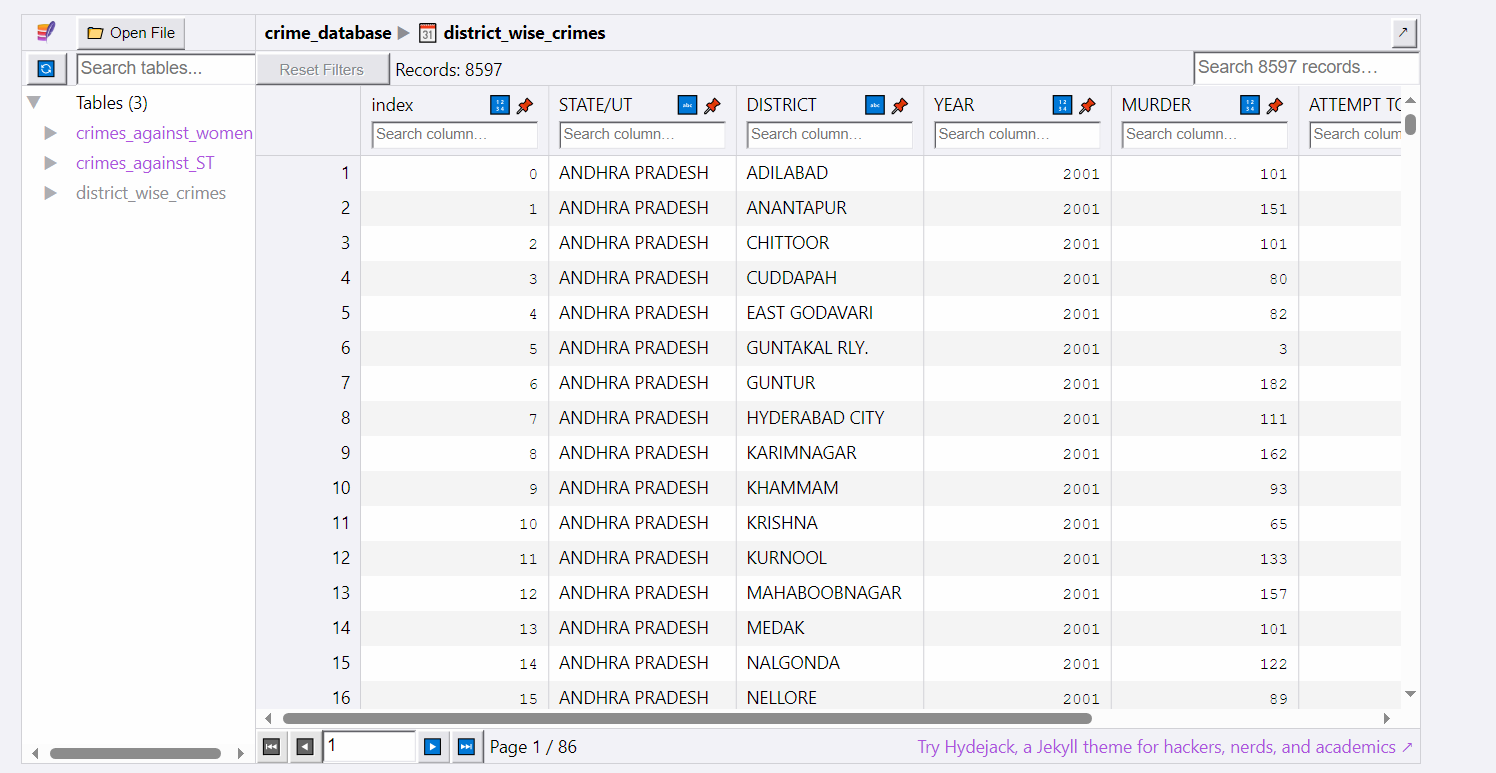

# REQ - 3.8.2

# Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.



In [58]:
result=connection.execute("""SELECT "STATE/UT",DISTRICT,YEAR,MAX(MURDER) FROM district_wise_crimes GROUP BY "STATE/UT"
ORDER BY Murder DESC;""")
for row in result:
    print(row)

('BIHAR', 'PATNA', 2004, 542)
('UTTAR PRADESH', 'MUZAFFARNAGAR', 2001, 324)
('MAHARASHTRA', 'MUMBAI', 2001, 295)
('JHARKHAND', 'RANCHI', 2002, 270)
('WEST BENGAL', 'PASCHIM MIDNAPUR', 2010, 268)
('KARNATAKA', 'BANGALORE COMMR.', 2010, 266)
('GUJARAT', 'AHMEDABAD COMMR.', 2002, 222)
('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214)
('TAMIL NADU', 'CHENNAI', 2012, 180)
('JAMMU & KASHMIR', 'BARAMULLA', 2001, 144)
('ASSAM', 'TINSUKIA', 2007, 143)
('MADHYA PRADESH', 'JHABUA', 2004, 139)
('CHHATTISGARH', 'BIZAPUR', 2006, 139)
('TRIPURA', 'WEST', 2003, 136)
('DELHI UT', 'NORTH WEST', 2002, 135)
('ODISHA', 'KEONJHAR', 2009, 109)
('RAJASTHAN', 'ALWAR', 2011, 104)
('UTTARAKHAND', 'HARIDWAR', 2001, 94)
('HARYANA', 'GURGAON', 2006, 93)
('PUNJAB', 'CP LUDHIANA', 2010, 90)
('NAGALAND', 'DIMAPUR', 2008, 64)
('MANIPUR', 'IMPHAL WEST', 2007, 61)
('KERALA', 'TRIVANDRUM', 2002, 58)
('MEGHALAYA', 'JAINTIA HILLS', 2003, 52)
('HIMACHAL PRADESH', 'KANGRA', 2003, 38)
('GOA', 'NORTH GOA', 2009, 33)
('PUDUCHERRY', '

# REQ - 3.8.3

# Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [61]:
con = sqlite3.connect('crime_database')
dataframe = pd.read_sql("""SELECT "STATE/UT", DISTRICT, Year, MAX(Rape) AS max_rapes, MAX("Kidnapping and Abduction") AS max_kidnappings FROM crimes_against_women
GROUP BY "Year"
ORDER BY max_rapes DESC;""", con)
dataframe

,STATE/UT,DISTRICT,Year,max_rapes,max_kidnappings
0,WEST BENGAL,MURSHIDABAD,2009,568,342
1,WEST BENGAL,MURSHIDABAD,2010,526,441
2,WEST BENGAL,MURSHIDABAD,2011,433,492
3,DELHI,OUTER,2007,369,237
4,UTTAR PRADESH,LUCKNOW,2008,334,331
5,WEST BENGAL,MURSHIDABAD,2012,257,464
6,DELHI,NORTH-WEST,2005,236,349
7,DELHI,NORTH-WEST,2006,224,287
8,ASSAM,GUWAHATI CITY,2004,197,228
9,DELHI,NORTH WEST,2002,159,259


In [62]:
dataframe['DISTRICT'].value_counts()

MURSHIDABAD      4
NORTH WEST       3
NORTH-WEST       2
OUTER            1
LUCKNOW          1
GUWAHATI CITY    1
Name: DISTRICT, dtype: int64

**Assuming NORTH-WEST and NORTH WEST are same districts and there is an error in data entry**

**From above We can Clearly see that NORTH-WEST is the state which appeared more than three years.**

# REQ - 3.8.4

# Use appropriate graphs to show your data (the result of 3.8.3)

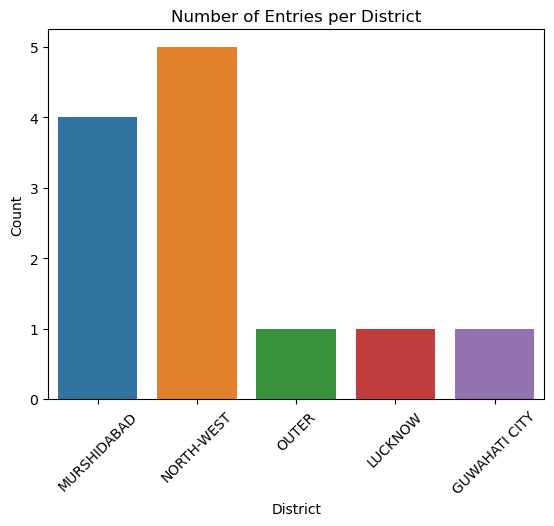

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your data
districts = ["MURSHIDABAD", "NORTH-WEST", "OUTER", "LUCKNOW", "GUWAHATI CITY"]
counts = [4, 5, 1, 1, 1]

# Create a bar chart
sns.barplot(x=districts, y=counts)

# Add title and labels
plt.title('Number of Entries per District')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation = 45)

# Show the plot
plt.show()